EDA with python and applying logistic regression 
    - using Titanic dataset from kaggle. 

We will be trying to predict a classification-survival or deceased. 

In [7]:
# importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [8]:
train = pd.read_csv('titanic_train.csv')

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratory Data Analysis 
    - We will start by checking out missing values 

Missing Data 
    - We can use seaborn to create a simple heatmap to see where we are missing data!
    

In [10]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
train.shape

(891, 12)

<AxesSubplot:>

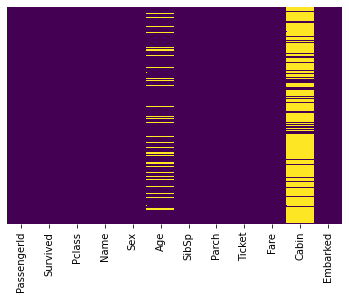

In [12]:
# visualization in seaborn to see null values 

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

It's clear that roughly almost of 20 % age values are missing, cabin values are highly missing, we can continue with setting it as 0's and 1's for missing and present values. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

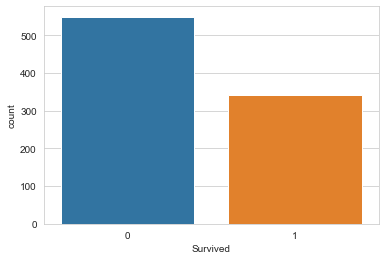

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Age', ylabel='count'>

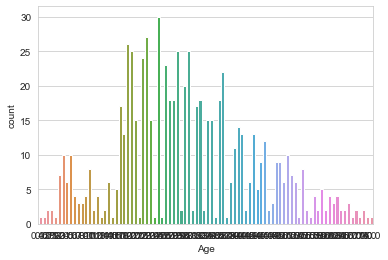

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Age',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

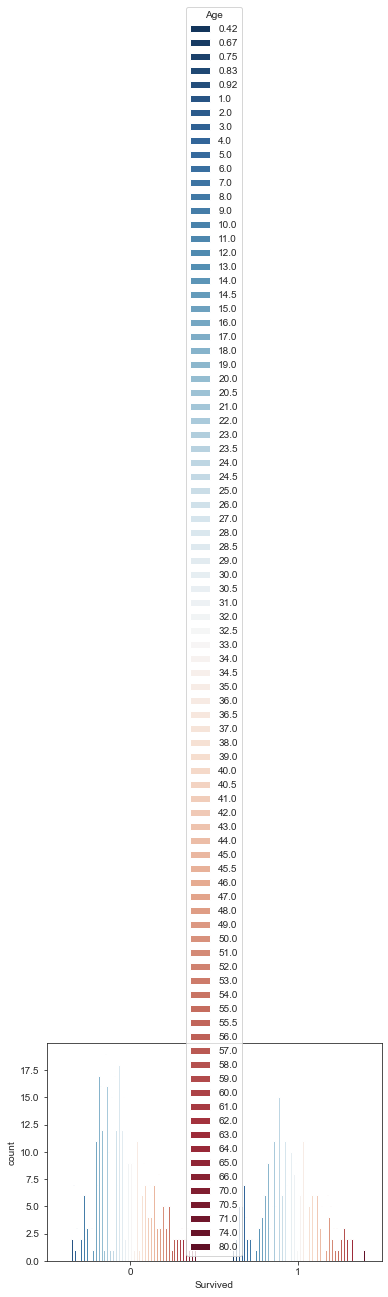

In [74]:
sns.set_style('ticks')
sns.countplot(x='Survived', hue='Age', data=train, palette='RdBu_r')
# palette for colorful visualization 
# hue is classified based on the Survived 


<AxesSubplot:xlabel='Survived', ylabel='count'>

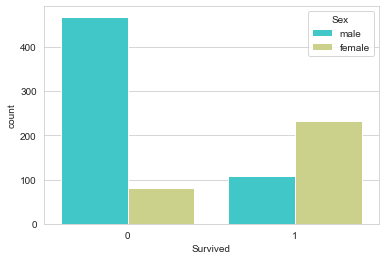

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

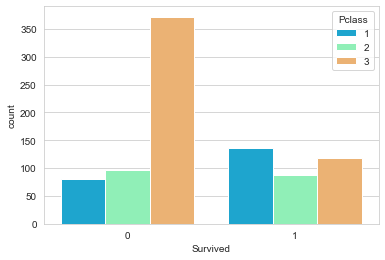

In [76]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Pclass', data=train, palette='rainbow')

<AxesSubplot:xlabel='Age'>

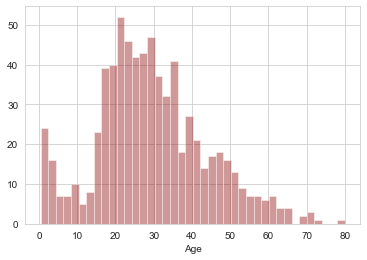

In [12]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=40)

<AxesSubplot:>

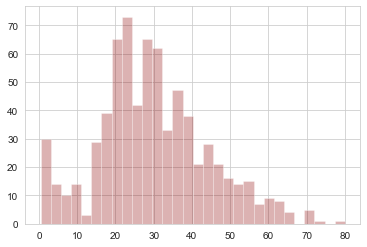

In [77]:
train['Age'].hist(bins=30, color='darkred', alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

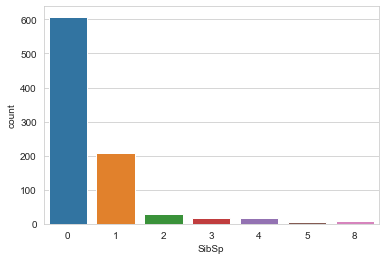

In [78]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

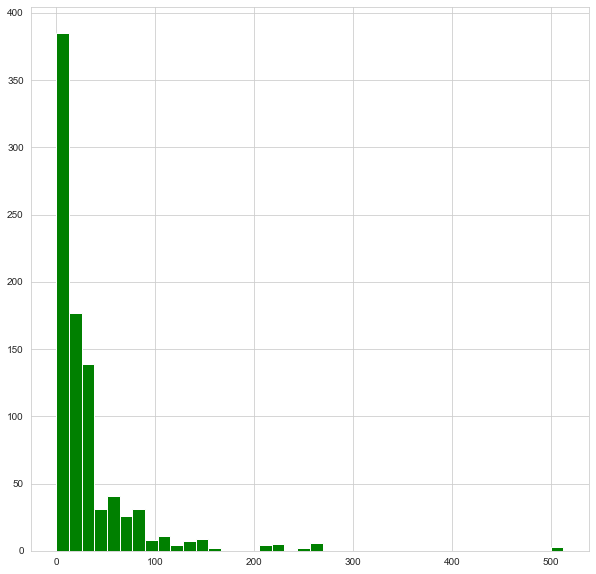

In [79]:
train['Fare'].hist(color='green', bins=40, figsize=(10,10))

Data Cleaning 
    - We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passangers(imputation). However we can be smarter and about this and check the average age by passanger class. For example: 
   

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

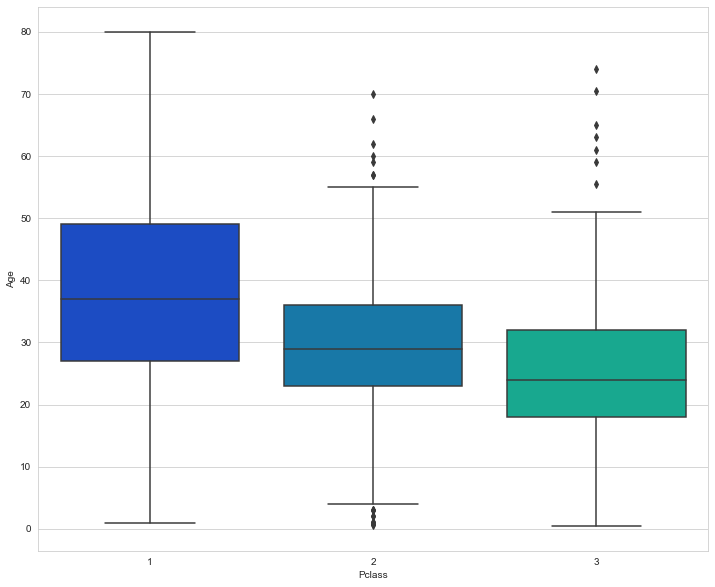

In [16]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Pclass', y='Age', data = train, palette='winter')

We can see weather the passenger in the higher class tend to be older, that makes sense. we'll use these average age values to impute based on Pclass for Age.

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age

Now apply that function : 

In [18]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

Now let's check that heat map again!

<AxesSubplot:>

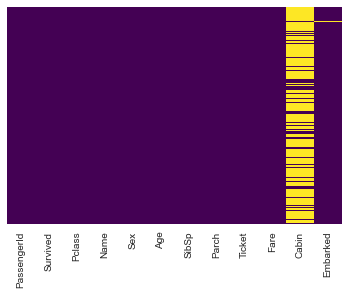

In [19]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Age column is replaced with value with passanger class 

For now we are dropping the column cabin that have a lot number of empty values

In [20]:
train.drop('Cabin', axis=1, inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

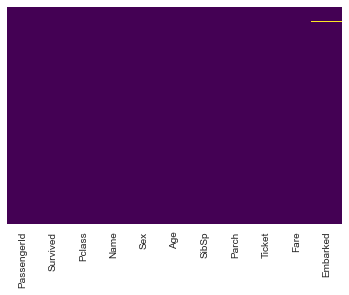

In [22]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


Converting categorical features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine leanring algorithm won't be able to directly take in those features as inputs: 

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 62.7+ KB


In [25]:
pd.get_dummies(train['Embarked'], drop_first=True).head()
# converting all unuseful data into dummy variable format 

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


we've created two columns sex and embark in categorical features and will drop columns such as name, sex, embarked and ticket

In [26]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [27]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [29]:
train = pd.concat([train,sex,embark], axis=1)
# merging into the above columns 

In [30]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Here, Survived is dependent feature, and remaining all columns are indepedent features

Great! Our data is ready for our model

**Building a Logistic Regression Model**
    - Let's start by splitting our data into a training set and test set.

**Train Test Split**

In [31]:
train.drop('Survived', axis=1).head()
# dropping the Survived column as it is a dependent feature

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [32]:
train['Survived'].head()
# this is our output data

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),
                                                    train['Survived'])

**Training and Predicting**

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [38]:
predictions = logmodel.predict(x_test)


In [39]:
from sklearn.metrics import confusion_matrix


In [41]:
accuracy=confusion_matrix(y_test,predictions)


In [42]:
accuracy


array([[130,  16],
       [ 21,  56]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score


In [44]:

accuracy=accuracy_score(y_test,predictions)
accuracy

0.8340807174887892

In [45]:
predictions


array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0], dtype=int64)

Let's move on to evaluate our model!

**Evaluation**

We can check precision,recall,f1-score using classification report!

In [46]:
from sklearn.metrics import classification_report


In [47]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.86      0.89      0.88       146
           1       0.78      0.73      0.75        77

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223

